In [6]:
import pandas as pd

prot_df = pd.read_csv('data/train_proteins.csv')
clin_df = pd.read_csv('data/train_clinical_data.csv')

In [73]:
class Measurement:
    def __init__(self, visit_id):
        self.id = visit_id
        self.patient, self.month = visit_id.split('_')

        self.proteins = []
        self.peptides = {}
        self.updrs1 = None
        self.updrs2 = None
        self.updrs3 = None
        self.updrs4 = None
        self.on_meds = None

    def add_protein_data(self, protein, NPX):
        self.peptides[protein] = NPX

class Patient:
    def __init__(self, id):
        self.id = id
        self.measurements = []

    def __repr__(self):
        return f"Patient(id={self.id})"
    
    def add_measurement(self, measurement):
        self.measurements.append(measurement)

    def __len__(self):
        return len(self.measurements)


In [45]:
patients = {}
# Instantiate a Patient object for each unique patient_id
for id in prot_df.patient_id.unique():
    patients[id] = Patient(id)

In [76]:
# Create a dictionary to store Measurement objects with visit_id as the key
measurements = {}

# Iterate through prot_df
for index, row in prot_df.iterrows():
    visit_id = row['visit_id']
    protein = row['UniProt']
    NPX = row['NPX']

    # If visit_id is not in the measurements dictionary, create a new Measurement object
    if visit_id not in measurements:
        measurements[visit_id] = Measurement(visit_id)

    # Add protein and NPX data to the corresponding Measurement object
    measurements[visit_id].add_protein_data(protein, NPX)

    # Get UPDRS scores and medication status for the visit_id from clin_df
    clin_data = clin_df.loc[clin_df['visit_id'] == visit_id]
    if len(clin_data) > 0:
        measurements[visit_id].updrs1 = clin_data['updrs_1'].values[0]
        measurements[visit_id].updrs2 = clin_data['updrs_2'].values[0]
        measurements[visit_id].updrs3 = clin_data['updrs_3'].values[0]
        measurements[visit_id].updrs4 = clin_data['updrs_4'].values[0]
        measurements[visit_id].on_meds = clin_data['upd23b_clinical_state_on_medication'].values[0]


In [77]:
# Iterate through the measurements dictionary
for visit_id, measurement in measurements.items():
    # Get the patient_id from the Measurement object
    patient_id = int(measurement.patient)

    # Add the Measurement object to the corresponding Patient object
    patients[patient_id].add_measurement(measurement)

# Print the measurements of the Patient with id 55
for measurement in patients[55].measurements:
    print(measurement.id)

55_0
55_6
55_12
55_36
55_0
55_6
55_12
55_36


In [78]:
for patient_id, patient in patients.items():
    num_measurements = len(patient)
    print(f"Patient {patient_id} with the {num_measurements} measurements")

Patient 55 with the 8 measurements
Patient 1517 with the 8 measurements
Patient 1923 with the 6 measurements
Patient 2660 with the 10 measurements
Patient 3636 with the 6 measurements
Patient 3863 with the 10 measurements
Patient 4161 with the 12 measurements
Patient 4172 with the 14 measurements
Patient 5027 with the 8 measurements
Patient 5178 with the 14 measurements
Patient 5645 with the 12 measurements
Patient 5742 with the 6 measurements
Patient 6054 with the 6 measurements
Patient 6211 with the 14 measurements
Patient 7051 with the 8 measurements
Patient 7117 with the 8 measurements
Patient 7568 with the 8 measurements
Patient 7832 with the 10 measurements
Patient 8699 with the 6 measurements
Patient 10053 with the 6 measurements
Patient 10174 with the 10 measurements
Patient 10541 with the 8 measurements
Patient 10715 with the 8 measurements
Patient 10718 with the 10 measurements
Patient 11459 with the 10 measurements
Patient 11686 with the 12 measurements
Patient 11928 with th

In [79]:
num_patients = len(patients)
num_measurements = len(measurements)
print(f"Number of Measurement objects: {num_measurements}")
print(f"Number of Patient objects: {num_patients}")


Number of Measurement objects: 1113
Number of Patient objects: 248


In [80]:
def plot_patient_measurements(patient):
    fig, ax = plt.subplots()
    ax.set_xlabel('Protein')
    ax.set_ylabel('NPX (log scale)')
    ax.set_title(f'Patient {patient.id} Measurements')

    for measurement in patient.measurements:
        ax.scatter(list(measurement.peptides.keys()), list(measurement.peptides.values()), label=measurement.id)

    ax.set_yscale('log')
    ax.legend()
    plt.show()

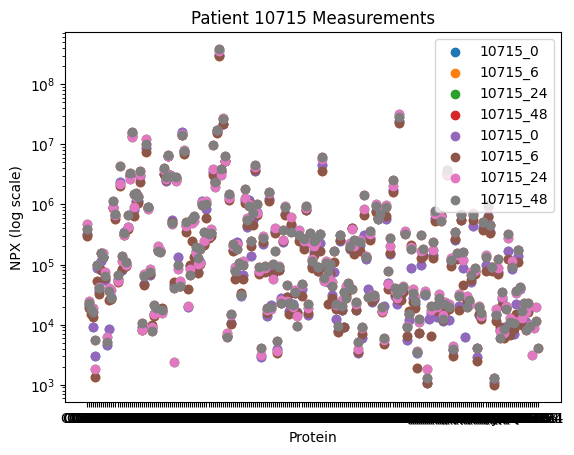

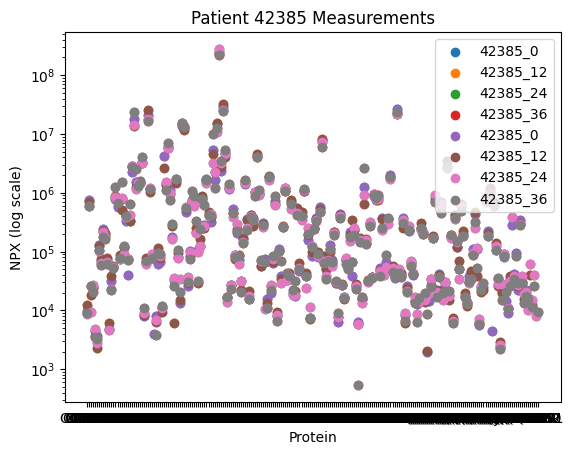

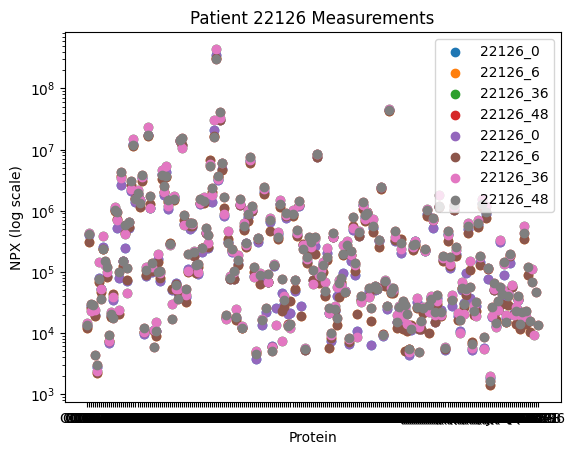

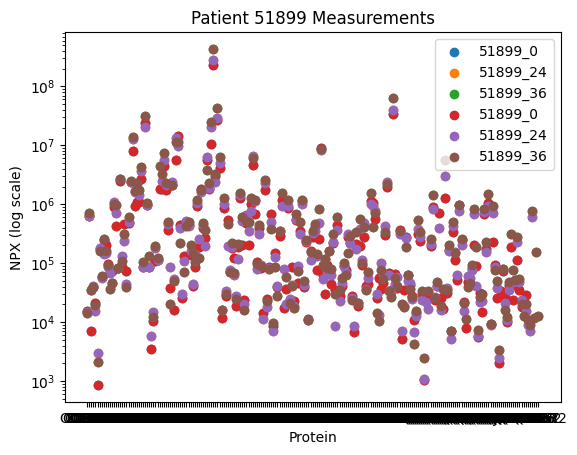

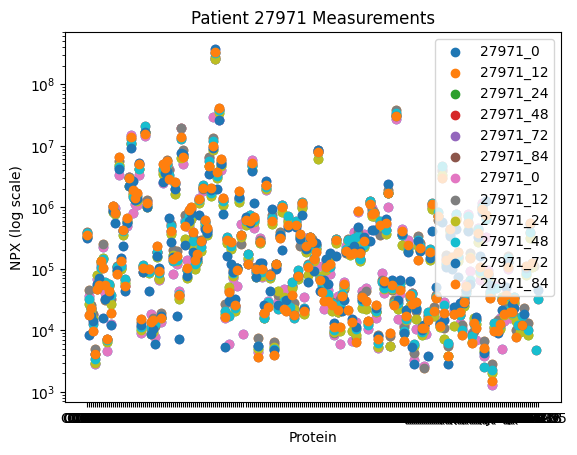

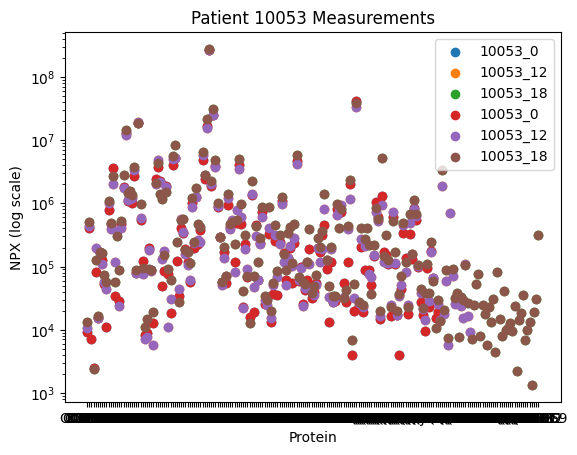

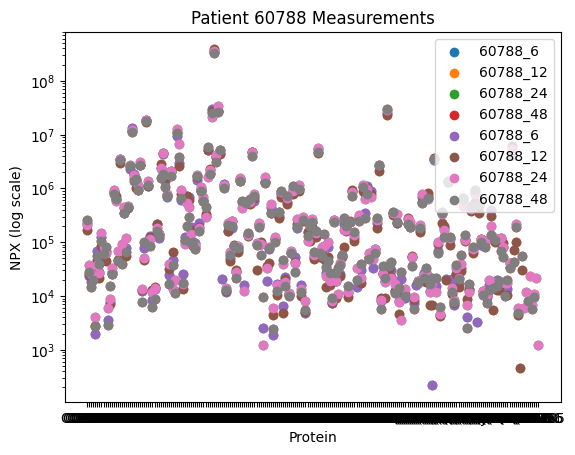

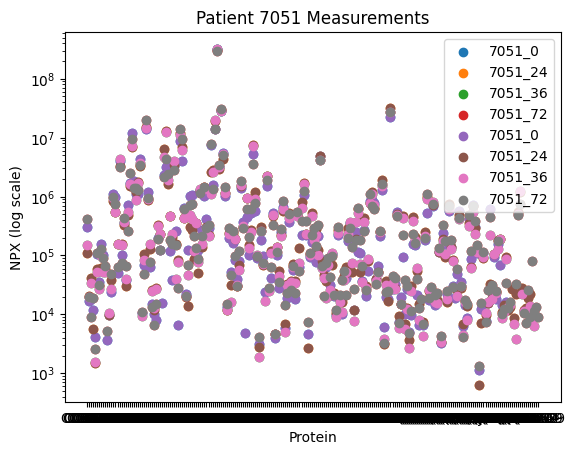

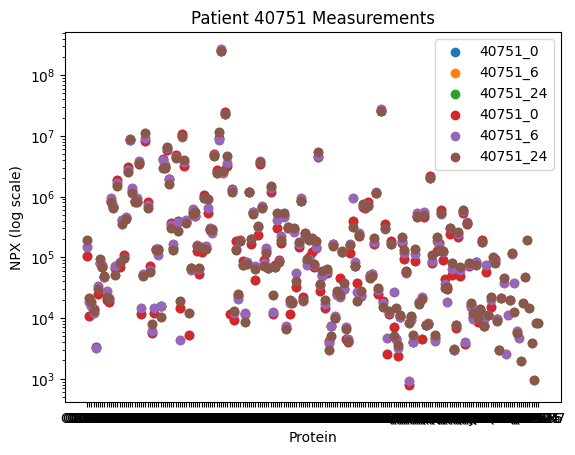

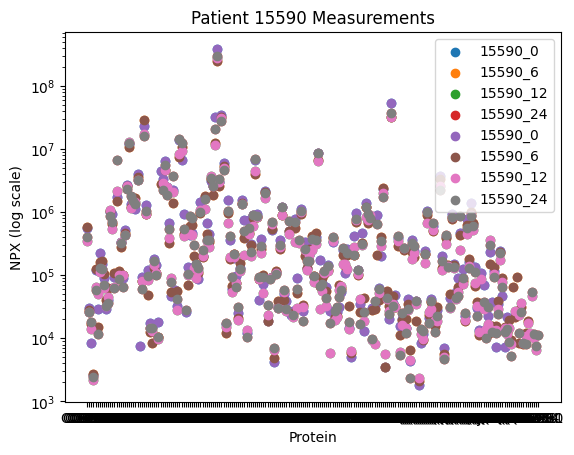

In [81]:
import random

# assuming patients is a dictionary or a set of Patient objects
# create a list of 10 randomly selected patients
random_patients = random.sample(list(patients.values()), 10)

# plot the measurements for each of the 10 random patients
for patient in random_patients:
    plot_patient_measurements(patient)


In [ ]:
import random

# assuming patients is a dictionary or a set of Patient objects
# create a list of 10 randomly selected patients
random_patients = random.sample(list(patients.values()), 10)

# plot the measurements for each of the 10 random patients
for patient in random_patients:
    plot_patient_measurements(patient)


In [1]:
## estimate UPDRS from Protein measurements


prot_df

NameError: name 'prot_df' is not defined